<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plot

In [13]:
from google.colab import files
import io
data = files.upload()

Saving result.csv to result (2).csv


In [15]:
df = pd.read_csv(io.BytesIO(data['result.csv']))
df = df.drop(['Date'],axis='columns')
df

,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito Value
0,21.6,18.7,25.0,0.0,2.4,52,66.0,2.2,21.6,16.1,0.0,63.1
1,22.6,18.4,27.3,0.0,2.3,50,63.0,8.3,23.9,14.6,0.0,70.2
2,21.2,18.7,23.1,0.0,2.3,66,72.6,0.0,21.1,14.3,0.0,70.5
3,21.8,16.7,26.9,0.0,2.2,46,67.5,9.9,23.1,12.1,0.0,70.5
4,20.9,16.9,25.9,0.0,2.4,48,67.3,8.0,22.7,11.9,0.0,63.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,18.9,10.2,26.9,7.5,1.7,17,50.8,10.9,20.0,3.6,17.0,24.4
1034,15.7,10.2,20.6,0.0,5.1,28,46.6,12.8,16.6,8.9,0.0,25.6
1035,12.9,8.9,17.6,27.0,4.9,72,86.1,0.0,14.8,8.5,27.0,30.4
1036,21.1,16.5,28.4,16.5,2.2,33,64.5,7.5,24.4,12.1,43.5,27.4


In [16]:
X = df.iloc[:,:].to_numpy()
Y = df.iloc[:,-1].to_numpy()

In [17]:
X,Y

(array([[21.6, 18.7, 25. , ..., 16.1,  0. , 63.1],
        [22.6, 18.4, 27.3, ..., 14.6,  0. , 70.2],
        [21.2, 18.7, 23.1, ..., 14.3,  0. , 70.5],
        ...,
        [12.9,  8.9, 17.6, ...,  8.5, 27. , 30.4],
        [21.1, 16.5, 28.4, ..., 12.1, 43.5, 27.4],
        [18.8, 12.2, 26. , ...,  5.7,  0. , 25.4]]),
 array([63.1, 70.2, 70.5, ..., 30.4, 27.4, 25.4]))

In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 531)

In [21]:
print(len(xTrain), len(xTest))
mseOos = []
nTreeList = range(500, 10000, 100)

for iTrees in nTreeList:
    depth = None
    maxFeat = 4 #조정해볼 것
    myRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth, max_features=maxFeat,
                    oob_score=False, random_state=531)
    myRFModel.fit(xTrain, yTrain)
    #데이터 세트에 대한 MSE 누적
    prediction = myRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))
    
print("MSE")
print(mseOos)

726 312
MSE
[13.341941350384536, 13.178292196136004, 12.898465263540052, 12.908932574068603, 12.993557813904903, 12.888186585801506, 12.962198931076776, 12.749477921563727, 12.554106342456002, 12.736709923960403, 12.678954354801032, 12.578701381097725, 12.648576081847667, 12.713122148029864, 12.648064814502467, 12.595961687259935, 12.619972664980793, 12.638551327585528, 12.51660249221457, 12.617285664663616, 12.611450597251377, 12.603286379063357, 12.662974632966668, 12.5602859168547, 12.52558237197394, 12.531398916356688, 12.490877170571942, 12.592656482365198, 12.611910051805504, 12.597478310777698, 12.714222498097266, 12.738017222770585, 12.71184337635719, 12.684766828396144, 12.728712884334323, 12.750561185840484, 12.72960278906312, 12.715000880055639, 12.696999193140446, 12.708002709626887, 12.741393872195776, 12.760713196726462, 12.722992657388165, 12.795670071955564, 12.75208524858771, 12.702133958687117, 12.680121355511524, 12.70347702328908, 12.703041302778711, 12.675272868778

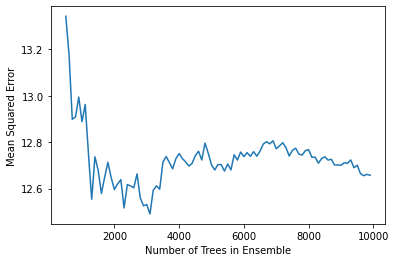

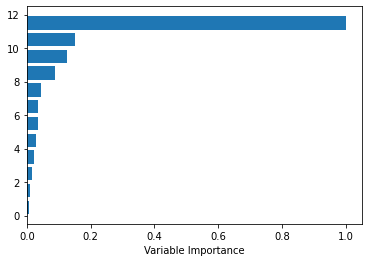

In [23]:
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

#피처 중요도 도표 그리기
featureImportance = myRFModel.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
#plot.yticks(barPos, wineNames[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()